## Network Congestion Forecast 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
warnings.filterwarnings("ignore")

## Load Data

In [3]:
df_1 = pd.read_excel('Input/Capacity WAN W45_24 V2.xlsb', engine='pyxlsb')

df_1.shape

(16674, 30)

In [4]:
df_2 = pd.read_excel('Input/Capacity WAN W46_24 v2.xlsb', engine="pyxlsb")

df_2.shape

(16297, 30)

In [5]:
df_master = pd.concat([df_1, df_2], ignore_index=True)
df_master.head(1)

,System,Type,Link,Link Vice Versa,COUNTIF,LEN,ResourceName+IP,ResourceName,Towerid NE,IPAddress NE,...,D5,D6,D7,MaxUtil,TXUtilization,Bandwidth(Kbps),TotalHit,Category,IP address,IP Address
0,RTN,WAN PLA,JAW-JB-CBI-0546/JAW-JB-CBI-0602,JAW-JB-CBI-0602/JAW-JB-CBI-0546,1,31,JAW-JB-CBI-0602_LEUWI KARET CILEUNGSI_2415099_...,JAW-JB-CBI-0602_LEUWI KARET CILEUNGSI_2415099_...,JAW-JB-CBI-0602,NaN,...,79.010002,100.0,100.0,100.0,9.72,602548.0,2,No Congest,NULL<>NULL,NaN


##  Preprocessing Dataset

In [6]:
df_master.shape

(32971, 31)

In [7]:
df_master.dtypes

# Base on data terdapat data non numeric maka diperlukan untuk melakukan transformasi data untuk mempermudah proses berikutnya

System              object
Type                object
Link                object
Link Vice Versa     object
COUNTIF              int64
LEN                  int64
ResourceName+IP     object
ResourceName        object
Towerid NE          object
IPAddress NE        object
FE ResourceName     object
Towerid FE          object
IPAddress FE        object
Week                object
Region              object
Kabupaten           object
Province            object
D1                 float64
D2                 float64
D3                 float64
D4                 float64
D5                 float64
D6                 float64
D7                 float64
MaxUtil            float64
TXUtilization      float64
Bandwidth(Kbps)    float64
TotalHit             int64
Category            object
IP address          object
IP Address          object
dtype: object

In [8]:
df_master.isnull().sum()

System                 0
Type                   0
Link                   0
Link Vice Versa        0
COUNTIF                0
LEN                    0
ResourceName+IP        0
ResourceName           0
Towerid NE             0
IPAddress NE       13458
FE ResourceName        0
Towerid FE             0
IPAddress FE       13752
Week                   0
Region             13485
Kabupaten          14112
Province           14049
D1                   473
D2                   508
D3                   534
D4                   480
D5                   586
D6                   573
D7                   487
MaxUtil                0
TXUtilization         16
Bandwidth(Kbps)     1529
TotalHit               0
Category               0
IP address         16297
IP Address         16674
dtype: int64

## Missing Value Handling

In [9]:
# Selected Column with Least Null

df_master = df_master[['Type','Link','Towerid NE','Towerid FE','LEN','COUNTIF','ResourceName','D1','D2','D3','D4','D5','D6','D7','MaxUtil','TXUtilization', 'Bandwidth(Kbps)', 'TotalHit', 'Category']]
df_master.isnull().sum()


Type                  0
Link                  0
Towerid NE            0
Towerid FE            0
LEN                   0
COUNTIF               0
ResourceName          0
D1                  473
D2                  508
D3                  534
D4                  480
D5                  586
D6                  573
D7                  487
MaxUtil               0
TXUtilization        16
Bandwidth(Kbps)    1529
TotalHit              0
Category              0
dtype: int64

In [10]:
# Filling Missing Value 
df_master['D1'].interpolate(method='linear', inplace=True)
df_master['D2'].interpolate(method='linear', inplace=True)
df_master['D3'].interpolate(method='linear', inplace=True)
df_master['D4'].interpolate(method='linear', inplace=True)
df_master['D5'].interpolate(method='linear', inplace=True)
df_master['D6'].interpolate(method='linear', inplace=True)
df_master['D7'].interpolate(method='linear', inplace=True)

df_master['TXUtilization'] = df_master['TXUtilization'].fillna(df_master['TXUtilization'].median())
df_master['Bandwidth(Kbps)'] = df_master['Bandwidth(Kbps)'].fillna(df_master['Bandwidth(Kbps)'].median())

df_master.isnull().sum()


Type               0
Link               0
Towerid NE         0
Towerid FE         0
LEN                0
COUNTIF            0
ResourceName       0
D1                 0
D2                 0
D3                 0
D4                 0
D5                 0
D6                 0
D7                 0
MaxUtil            0
TXUtilization      0
Bandwidth(Kbps)    0
TotalHit           0
Category           0
dtype: int64

In [11]:
lb = LabelEncoder()

# Get Column non Numerical
cat_cols = [col for col in df_master.columns if df_master[col].dtype == 'object']

for col in cat_cols:
    df_master[col] = lb.fit_transform(df_master[col])

df_master.dtypes

Type                 int32
Link                 int32
Towerid NE           int32
Towerid FE           int32
LEN                  int64
COUNTIF              int64
ResourceName         int32
D1                 float64
D2                 float64
D3                 float64
D4                 float64
D5                 float64
D6                 float64
D7                 float64
MaxUtil            float64
TXUtilization      float64
Bandwidth(Kbps)    float64
TotalHit             int64
Category             int32
dtype: object

In [12]:
df_master.head(1)

,Type,Link,Towerid NE,Towerid FE,LEN,COUNTIF,ResourceName,D1,D2,D3,D4,D5,D6,D7,MaxUtil,TXUtilization,Bandwidth(Kbps),TotalHit,Category
0,1,2264,2033,1396,31,1,2120,72.370003,75.730003,77.43,75.370003,79.010002,100.0,100.0,100.0,9.72,602548.0,2,1


array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Link'}>,
        <Axes: title={'center': 'Towerid NE'}>,
        <Axes: title={'center': 'Towerid FE'}>],
       [<Axes: title={'center': 'LEN'}>,
        <Axes: title={'center': 'COUNTIF'}>,
        <Axes: title={'center': 'ResourceName'}>,
        <Axes: title={'center': 'D1'}>],
       [<Axes: title={'center': 'D2'}>, <Axes: title={'center': 'D3'}>,
        <Axes: title={'center': 'D4'}>, <Axes: title={'center': 'D5'}>],
       [<Axes: title={'center': 'D6'}>, <Axes: title={'center': 'D7'}>,
        <Axes: title={'center': 'MaxUtil'}>,
        <Axes: title={'center': 'TXUtilization'}>],
       [<Axes: title={'center': 'Bandwidth(Kbps)'}>,
        <Axes: title={'center': 'TotalHit'}>,
        <Axes: title={'center': 'Category'}>, <Axes: >]], dtype=object)

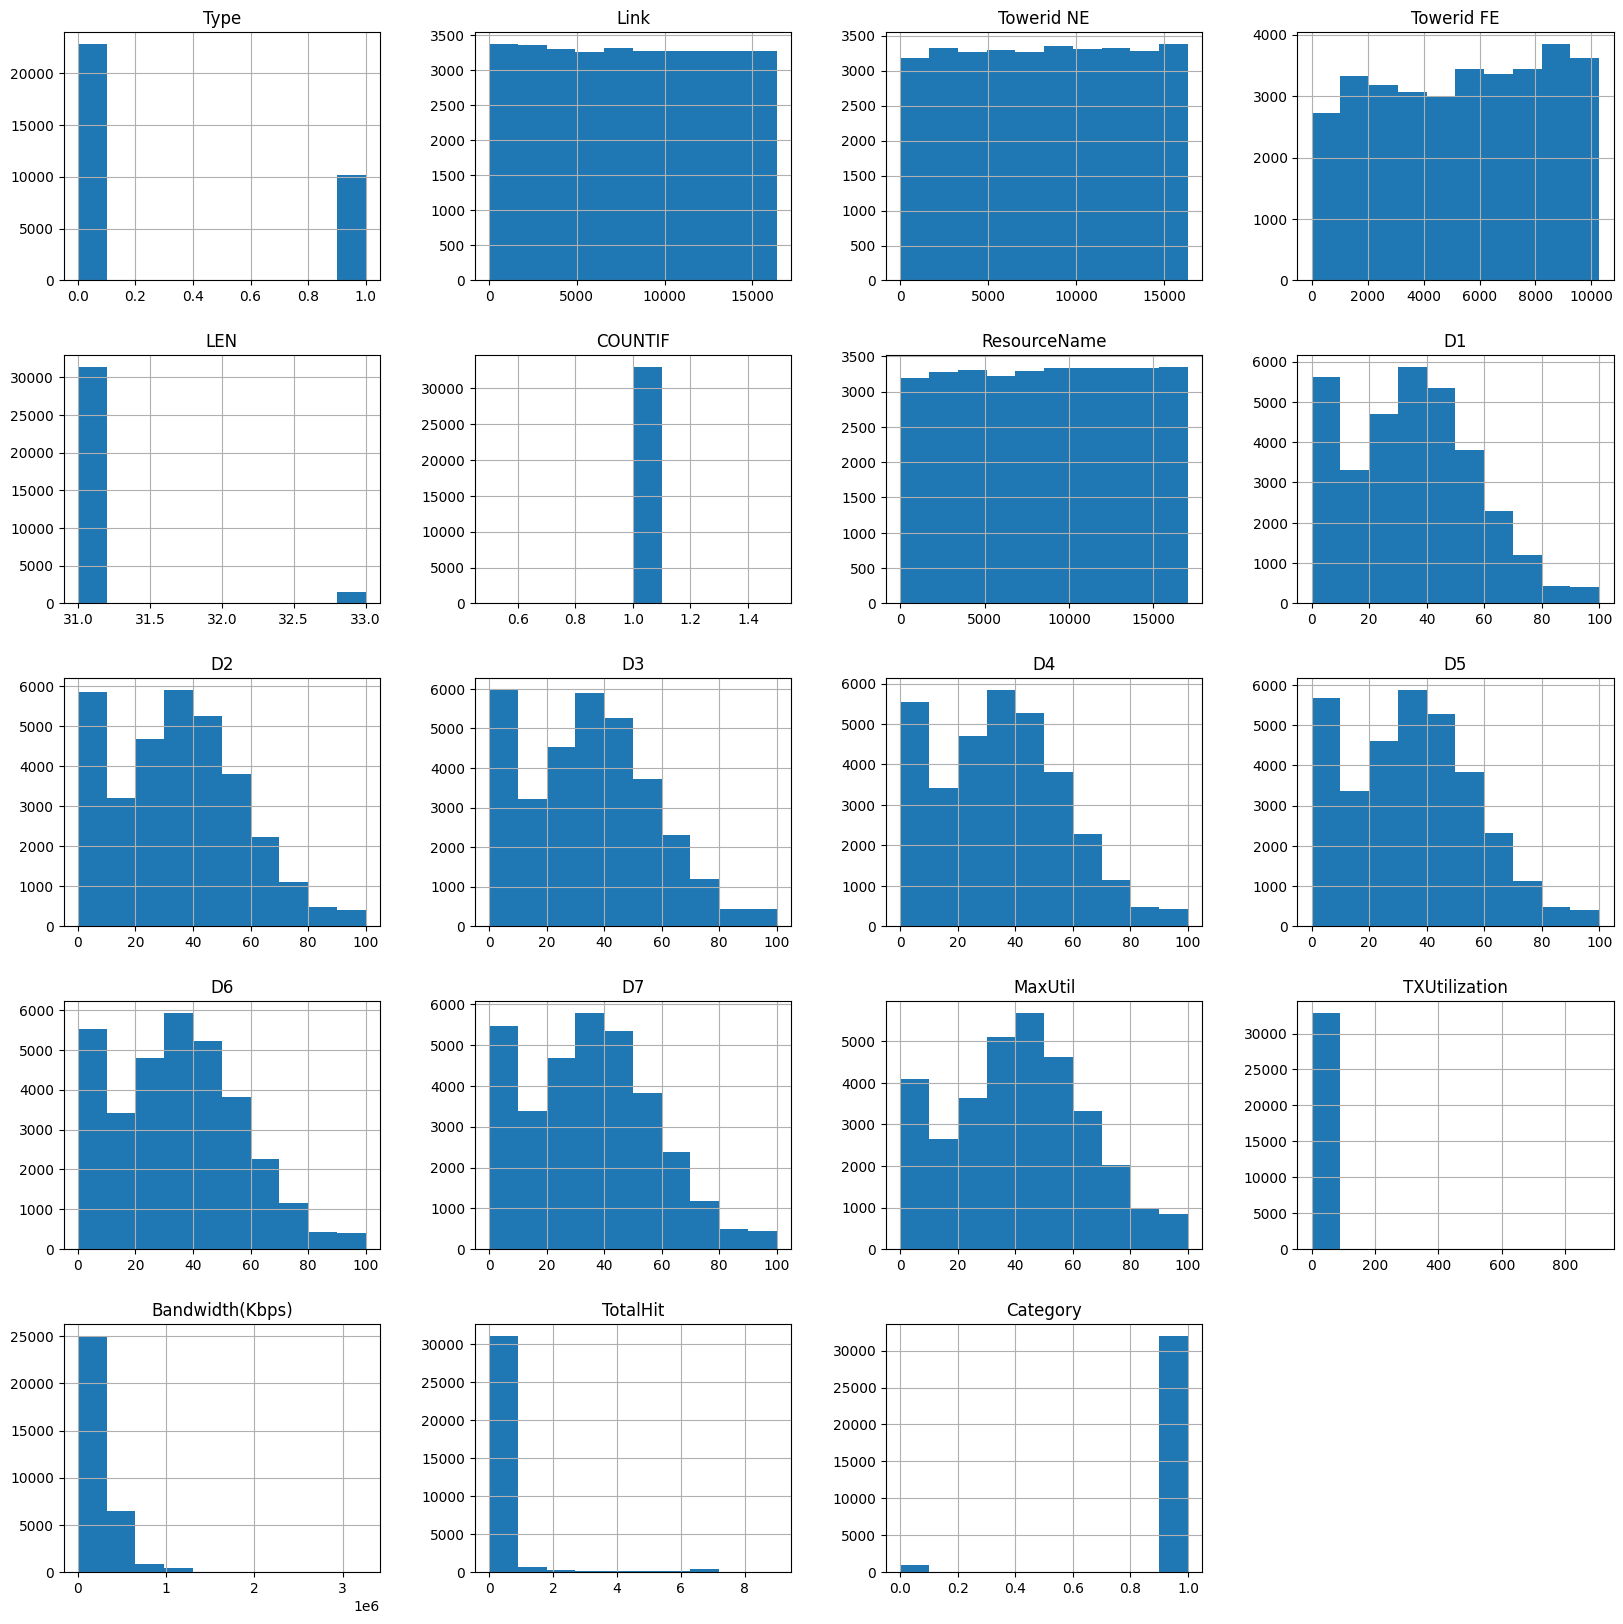

In [13]:
df_master.hist(figsize=(20,20))

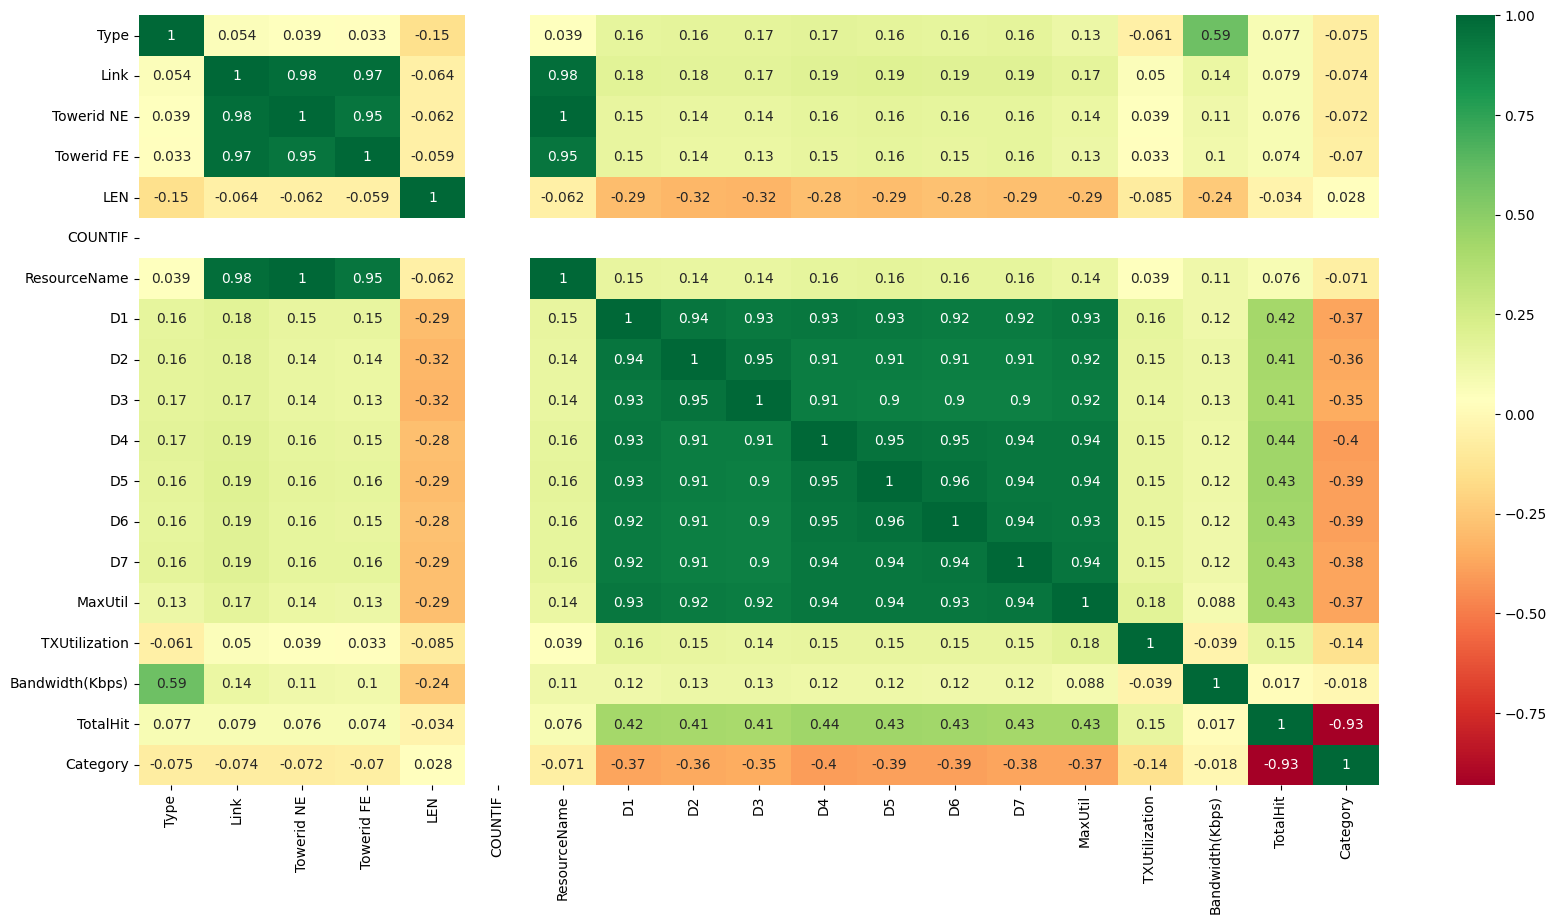

In [14]:
# Heatmap Check 

fig = plt.figure(figsize=(20,10))
corrMatrix = df_master.corr()
sns.heatmap(corrMatrix,annot=True,cmap ='RdYlGn')
plt.show()

Base on checking the feature will be used is 

X : TotalHit, D1-D7,TxUtilization, MaxUtil, Bandwidth Y : Category

In [15]:
df_x = df_master[['Link','TotalHit','D1','D2','D3','D4','D5','D6','D7','TXUtilization','MaxUtil', 'Bandwidth(Kbps)']]
df_y = df_master[['Category']]

## Save Data

In [16]:
from sklearn.model_selection import train_test_split


#Splitting Data to Learn
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.4, random_state= 100)

In [17]:
x_train.to_csv("Preprocessing Result/x_train_data.csv", sep=',', index=False)
y_train.to_csv("Preprocessing Result/y_train_data.csv", sep=',', index=False)
x_test.to_csv('Preprocessing Result/x_test_data.csv', sep=',', index=False)
y_test.to_csv('Preprocessing Result/y_test_data.csv', sep=',', index=False)

## Data Normalization

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2


In [30]:
df_x_train = pd.read_csv("Preprocessing Result/x_train_data.csv", sep=',')
df_y_train = pd.read_csv("Preprocessing Result/y_train_data.csv", sep=',')
df_x_test = pd.read_csv("Preprocessing Result/x_test_data.csv", sep=',')
df_y_test = pd.read_csv("Preprocessing Result/y_test_data.csv", sep=',')

df_y_train.head(1)

,Category
0,1


In [22]:
#check best feature after k=9
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(df_x_train,df_y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_x_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Feature','Score']

print(featureScores.nlargest(15,'Score'))

            Feature         Score
11  Bandwidth(Kbps)  1.129026e+06
0              Link  3.186405e+05
1          TotalHit  8.621173e+04
5                D4  4.577391e+04
6                D5  4.462524e+04
7                D6  4.346577e+04
8                D7  4.122500e+04
2                D1  4.038599e+04
3                D2  3.847698e+04
10          MaxUtil  3.811340e+04
4                D3  3.685217e+04
9     TXUtilization  5.209584e+03


In [32]:
# MinMaxScaler or Normalization Choosen because we want to use Neural Network Related Algorithm
norm_scaler = MinMaxScaler()

x_train_normalize = pd.DataFrame(norm_scaler.fit_transform(df_x_train), columns=df_x_train.columns)
x_test_normalize = pd.DataFrame(norm_scaler.fit_transform(df_x_test), columns=df_x_test.columns)
x_train_normalize.head(1)

,Link,TotalHit,D1,D2,D3,D4,D5,D6,D7,TXUtilization,MaxUtil,Bandwidth(Kbps)
0,0.346166,0.0,0.1908,0.1921,0.1731,0.1836,0.1731,0.1813,0.1744,0.0,0.1921,0.063266


In [ ]:
x_train_normalize.to_csv("Normalization/x_train_data.csv", sep=',', index=False)
x_test_normalize.to_csv('Normalization/x_test_data.csv', sep=',', index=False)

## Model Creation

In [257]:
# LSTM Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import joblib

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

In [240]:
df_x_train = pd.read_csv("Normalization/x_train_data.csv", sep=',')
df_x_test = pd.read_csv("Normalization/x_test_data.csv", sep=',')

df_x_test.shape

(13189, 12)

## Logitic Regression

In [243]:
x_train, x_val, y_train,y_val = train_test_split(df_x_train,df_y_train,test_size = 0.3)

clf = LogisticRegression( multi_class='multinomial', solver='lbfgs')
clf.fit(x_train, y_train)

y_pred_lr = clf.predict(x_val)

In [244]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_lr]
print(confusion_matrix(y_val, y_pred_lr))
print(classification_report(y_val, y_pred_lr))
print("Accuracy:",accuracy_score(y_val, y_pred_lr)*100)

[[ 157   10]
 [   1 5767]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       167
           1       1.00      1.00      1.00      5768

    accuracy                           1.00      5935
   macro avg       1.00      0.97      0.98      5935
weighted avg       1.00      1.00      1.00      5935

Accuracy: 99.81465880370682


In [245]:
y_pred_test = clf.predict(df_x_test)

import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_test]
print(confusion_matrix(df_y_test, y_pred_test))
print(classification_report(df_y_test, y_pred_test))
print("Accuracy:",accuracy_score(df_y_test, y_pred_test)*100)

[[  350     8]
 [    0 12831]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       358
           1       1.00      1.00      1.00     12831

    accuracy                           1.00     13189
   macro avg       1.00      0.99      0.99     13189
weighted avg       1.00      1.00      1.00     13189

Accuracy: 99.93934339222079


In [248]:
#Save Best Estimator 

joblib.dump(clf, 'Output Model/Congestion Classifier/logistic_regression_model.pkl')

['Output Model/Congestion Classifier/logistic_regression_model.pkl']

## XGBoost

In [254]:
xgb = XGBClassifier(
 learning_rate =0.05,
 n_estimators=500,
 max_depth=5,
 min_child_weight=2,
 gamma=0.1,
 subsample=0.6,
 colsample_bytree=0.7,
 reg_alpha=0.1,
 scale_pos_weight=1,
 random_state=7,
 seed=27)


xgb.fit(df_x_train,df_y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=7, ...)

In [255]:
y_pred_xgb=xgb.predict(x_val)

warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_xgb]
print(confusion_matrix(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))
print("Accuracy:",accuracy_score(y_val, y_pred_xgb)*100)

[[ 167    0]
 [   0 5768]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00      5768

    accuracy                           1.00      5935
   macro avg       1.00      1.00      1.00      5935
weighted avg       1.00      1.00      1.00      5935

Accuracy: 100.0


In [263]:
# from sklearn.grid_search import GridSearchCV   #Perforing grid search
param_test1 = {
 'learning_rate':[0.01,0.025,0.05],
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=27), param_grid = param_test1,n_jobs=4, cv=5)

gsearch1.fit(df_x_train,df_y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4, param_grid={'learning_rate': [0.01, 0.025, 0.05]})

In [264]:
y_pred_test = gsearch1.predict(df_x_test)

warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_test]
print(confusion_matrix(df_y_test, y_pred_test))
print(classification_report(df_y_test, y_pred_test))
print("Accuracy:",accuracy_score(df_y_test, y_pred_test)*100)

[[  358     0]
 [    0 12831]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       358
           1       1.00      1.00      1.00     12831

    accuracy                           1.00     13189
   macro avg       1.00      1.00      1.00     13189
weighted avg       1.00      1.00      1.00     13189

Accuracy: 100.0


In [265]:
#Save Best Estimator 

joblib.dump(clf, 'Output Model/Congestion Classifier/xgboost_model.pkl')

['Output Model/Congestion Classifier/xgboost_model.pkl']

## LSTM Congestion

In [279]:
df_x_train = pd.read_csv("Preprocessing Result/x_train_data.csv", sep=',')
df_y_train = pd.read_csv("Preprocessing Result/y_train_data.csv", sep=',')
df_x_test = pd.read_csv("Preprocessing Result/x_test_data.csv", sep=',')
df_y_test = pd.read_csv("Preprocessing Result/y_test_data.csv", sep=',')

df_x_train.head(1)

,Link,TotalHit,D1,D2,D3,D4,D5,D6,D7,TXUtilization,MaxUtil,Bandwidth(Kbps)
0,5674,0,19.08,19.209999,17.309999,18.360001,17.309999,18.129999,17.440001,0.0,19.209999,206132.0


In [280]:
threshold_mae = threshold_mae = (df_y_train['Category'].max() - df_y_train['Category'].min()) * 10/100

# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('MeanSquaredError') <= threshold_mae):
      self.model.stop_training = True
      print("\n accuracy Reached")

callbacks = myCallback()

In [ ]:
model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(60, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mean_squared_error", metrics=['accuracy','MeanSquaredError', 'MeanAbsoluteError'])
model.fit(df_x_train, df_y_train, epochs=100)

Epoch 1/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - MeanAbsoluteError: 0.0983 - MeanSquaredError: 0.0447 - accuracy: 0.9600 - loss: 0.0447
Epoch 2/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - MeanAbsoluteError: 0.0214 - MeanSquaredError: 0.0031 - accuracy: 0.9968 - loss: 0.0031
Epoch 3/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - MeanAbsoluteError: 0.0081 - MeanSquaredError: 0.0013 - accuracy: 0.9986 - loss: 0.0013
Epoch 4/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - MeanAbsoluteError: 0.0084 - MeanSquaredError: 0.0012 - accuracy: 0.9983 - loss: 0.0012
Epoch 5/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - MeanAbsoluteError: 0.0032 - MeanSquaredError: 1.8804e-04 - accuracy: 0.9998 - loss: 1.8804e-04
Epoch 6/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - MeanAbsoluteError: 0.0126 - MeanSquaredError: 0.0014 - accuracy: 0.9988 - loss: 0.0014
Epoch 7/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - MeanAbsoluteError: 0.0092 - MeanSquaredError: 0.0013 - accuracy: 0.9985 - loss: 0.001

In [285]:
y_pred_train = model.predict(df_x_train)
y_pred_test = model.predict(df_x_test)

619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_train]

print(confusion_matrix(df_y_train, y_pred_train))
print(classification_report(df_y_train, y_pred_train))
print("Accuracy:",accuracy_score(df_y_train, y_pred_train)*100)

[[  565     0]
 [19217     0]]
              precision    recall  f1-score   support

           0       0.03      1.00      0.06       565
           1       0.00      0.00      0.00     19217

    accuracy                           0.03     19782
   macro avg       0.01      0.50      0.03     19782
weighted avg       0.00      0.03      0.00     19782

Accuracy: 2.8561318370235567


In [ ]:
y_pred_test = [np.argmax(element) for element in y_pred_test]

print(confusion_matrix(df_y_test, y_pred_test))
print(classification_report(df_y_test, y_pred_test))

print("Accuracy:",accuracy_score(df_y_test, y_pred_test)*100)

[[  358     0]
 [12831     0]]
              precision    recall  f1-score   support

           0       0.03      1.00      0.05       358
           1       0.00      0.00      0.00     12831

    accuracy                           0.03     13189
   macro avg       0.01      0.50      0.03     13189
weighted avg       0.00      0.03      0.00     13189

Accuracy: 2.714383198119645


In [290]:
model.save('Output Model/Congestion Classifier/lstm_model.h5')